In [1]:
import os
import locate_file
import matplotlib
%matplotlib inline

working_directory = locate_file.locate_file()
print(working_directory)
os.chdir(working_directory)

import setup
from image_handling import read_image,display_image

import lib_image_processing
from gaussian import gaussian

/Users/ironstein/Documents/projects working directory/learning python/Python-tutorials/C library for image processing/08 - pointers to pointers and implementation of non maximum supression algorithm/
platform : darwin


In [2]:
setup.compile()

compiling image_processing.c


<class 'numpy.uint8'>


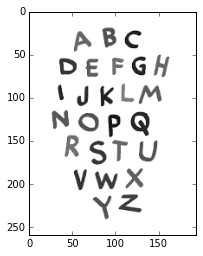

In [3]:
image = read_image('sample_images/sample_image_1.png')
display_image(image)
print(type(image[0][0]))

# gaussian smoothening

<p>The image is first smoothened by convolving it with a gaussian filter kernel.</p>
<p>The <b><i>g.generate_gaussian_smoothening_kernel</i></b> function takes input argument as $\sigma$ (the standard deviation of the gaussian filter) and generates a gaussian kernel for corresponding size and values.</p>

<p>The <b><i>lib_image_processing.convolution</i></b> function takes input arguments the image and the kernel, and returns the convolved image. 

1571


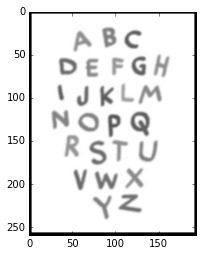

In [16]:
g = gaussian()
kernel = g.generate_gaussian_smoothening_kernel(1)
smoothened_image = lib_image_processing.convolution(image,kernel,convert_to_uint8 = False)
display_image(smoothened_image)

# Convolving the blurred image with sobel operator kernels
The blurred image is then convolved with sobel X and Y operators as shown  :
$g_{x} = 
		\left(
		\begin{matrix}
		-1 & 0 & 1 \\
		-2 & 0 & 2 \\
		-1 & 0 & 1
		\end{matrix}
		\right)
		*A\ \ \ \ \
		and
		\ \ \ \ \ 
		g_{y} = 
		\left(
		\begin{matrix}
		-1&  -2&  -1& \\
		 0&   0&   0& \\
		 1&   2&   1&
		\end{matrix}
		\right)
		*A
		$

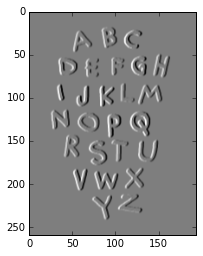

In [6]:
sobel_x = [1,[[1,0,-1],[2,0,-2],[1,0,-1]]]
display_image(lib_image_processing.convolution(image,sobel_x))

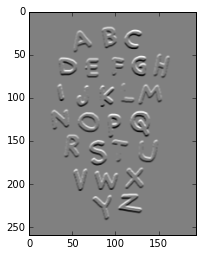

In [7]:
sobel_y = [1,[[1,2,1],[0,0,0],[-1,-2,-1]]]
display_image(lib_image_processing.convolution(image,sobel_y))

# Generate Gradient magnitude and Gradient direction images
From the images generated by the Sobel operator, we have to now calculate the magnitude and angles of the gradient. At each point in the image, the resulting gradient approximations can be combined to give the gradient magnitude and the gradient direction, using:
		$G = \sqrt{g_{x}^{2} + g_{y}^{2}} \ \ \ \ \ and \ \ \ \ \ 
		\theta = tan^{-1}(\frac{g_{y}}{g_{x}})$

In [5]:
[magnitude,angle] = lib_image_processing.sobel_operator(image)

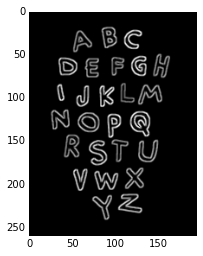

In [8]:
display_image(magnitude)

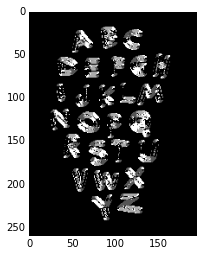

In [9]:
display_image(angle)

# Non-Maximum supression and Double Thresholding

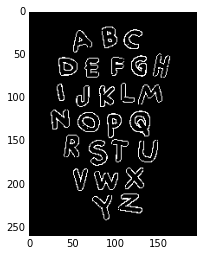

In [13]:
log_kernel = [1,[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]]
display_image(lib_image_processing.convolution(image,log_kernel),bnw=True,threshold=100)